## 5. Przybliżone rozwiązywanie równań różniczkowych

### 5.1. Przybliżone rozwiązywanie równań różniczkowych pierwszego rzędu

### 5.1.1. Twierdzenie Picarda-Lindelöfa

Twierdzenie 5.1 (Picarda-Lindelöfa). Niech $f: P \rightarrow R$ będzie funkcja spetniajaca na prostokacie $P:=\left[x_{0}-\delta, x_{0}+\delta\right] \times\left[y_{0}-\epsilon, y_{0}+\epsilon\right]$, gdzie $\delta>$ $0, \epsilon>0$, warunek Lipschitza względem $y$, tzn., istnieje stała $L>0$ taka, że

$$
\left|f\left(x, y_{1}\right)-f\left(x, y_{2}\right)\right| \leqslant L\left|y_{1}-y_{2}\right|
$$

dla wszystkich $x \in\left[x_{0}-\delta, x_{0}+\delta\right]$ i wszystkich $y 1, y 2 \in\left[y_{0}-\epsilon, y_{0}+\right.$ $\epsilon]$. Wówczas istnieje dokładnie jedno rozwiązanie $y:\left[x_{0}-\eta, x_{0}+\eta\right] \rightarrow \mathbb{R}$ zagadnienia początkowego

$$
\left\{\begin{array}{l}
y^{\prime}(x)=f(x, y(x)), \quad x \in(a, b), \\
y\left(x_{0}\right)=y_{0},
\end{array}\right.
$$

gdzie $f:[a, b] \times \mathbb{R} \rightarrow \mathbb{R}, \eta=\min \left\{\delta, \frac{\epsilon}{M}\right\}, M=\sup \{|f(x, y)|:(x, y) \in P\}$.

### 5.1.2. Metoda Eulera

Metoda Eulera polega na konstrukcji rozwiązań przybliżonych na podstawie zależności:

1. Metoda Eulera jawna (w przód): $y_{n+1}=y_{n}+h f\left(x_{n}, y_{n}\right)$,
2. Metoda Eulera niejawna ( w tył): $y_{n+1}=y_{n}+h f\left(x_{n+1}, y_{n+1}\right.$ ), gdzie $y_{0}$ jest dane.

Dla $n=0,1, \ldots, N$, wprowadzamy definicję błędu $e_{n}:=y\left(x_{n}\right)-y_{n}$. Błąd metody jawnej Eulera szacujemy jako:

$$
\left|e_{n+1}\right| \leqslant \frac{M}{L}\left(e^{(b-a) L}-1\right) h,
$$

gdzie stała $M>0$ spełnia warunek $M \geqslant \frac{O\left(h^{2}\right)}{h^{2}}$, a stała $L$ wynika z warunku Lipschitza (patrz rozdział 5.1.1.).

Uwaga Metoda jawna nie zawsze jest stabilna. Przykładowo dla zagadnienia:

$$
\left\{\begin{array}{l}
y^{\prime}(x)=-k y(x), \quad x>0 \\
y(0)=1,
\end{array}\right.
$$

gdzie $k>0$, rozwiązanie jest stabilne o ile $k h<1$.
Uwaga Metoda niejawna jest absolutnie stabilna.


In [1]:
import sys

sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
from src.differential import (
    euler_method,
    backward_euler_method,
    runge_kutta_2nd_order,
    runge_kutta_4th_order,
    finite_difference_method,
    solve_heat_equation,
)

# Exmaple

In [2]:
def differential_evolution(x, y):
    """Computes the differential evolution function."""
    return -5 * y + 4 * np.exp(-x)


def solution(x):
    """Returns the exact solution of the differential equation."""
    return np.exp(-x)

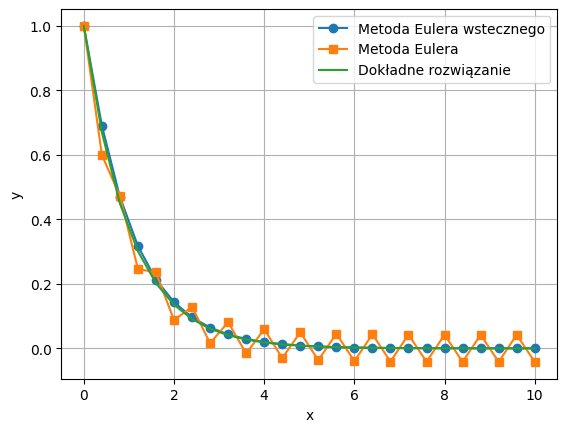

In [3]:


x0, x_end = 0, 10  # Zakres
y0 = 1  # Warunek początkowy
h = 0.4  # Krok

x_vals, y_vals = backward_euler_method(differential_evolution, y0, x0, x_end, h)
x_euler, y_euler = euler_method(differential_evolution, y0, x0, x_end, h)


x_exact = np.arange(x0, x_end + h, h)
y_exact = solution(x_exact)

plt.plot(x_vals, y_vals, "o-", label="Metoda Eulera wstecznego")
plt.plot(x_euler, y_euler, "s-", label="Metoda Eulera")
plt.plot(x_exact, y_exact, "-", label="Dokładne rozwiązanie")

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

wzór dla metody jawnej
\begin{align}
y_n = y_0(1-5h)^n+\sum_{k=0}^{n-1}{4e^{-x_k}(1-5h)^{n-1-k}}
\end{align}
Jest to szereg zbirzny gdy:
\begin{gather}
-1\le 1-5h\le1 \\
\frac{2}{5}\ge h>0
\end{gather}
wzór dla metody niejawnej
\begin{align}
y_n = y_0 \frac{1}{(1+5h)^n} + \sum_{i=1}^{n}{\frac{4e^{-x_i}h}{(1+5h)^{n-i+1}}}
\end{align}


In [4]:
def exact_bakcword_solusion(x0, n, h, y0):
    xn = np.arange(x0, x0 + (n + 1) * h, h)
    yn = [y0]
    for i in range(1, n + 1):
        yn.append(
            y0 * (1 / (1 + 5 * h)) ** i
            + np.sum(
                [
                    np.exp(-xn[j]) * 4 * (1 / (1 + 5 * h)) ** (i - j + 1) * h
                    for j in range(1, i + 1)
                ]
            )
        )
    return xn, yn

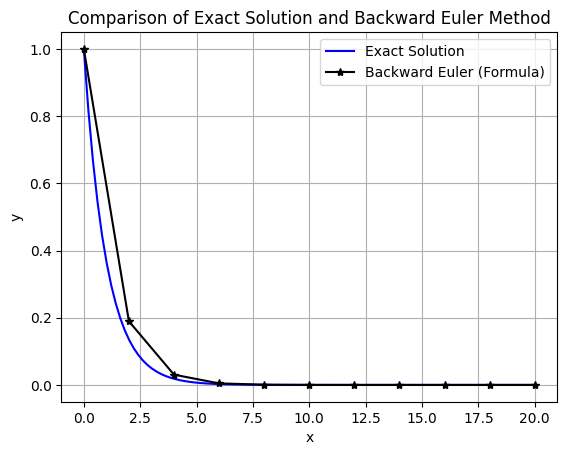

In [5]:
a = 0
b = 20
y0 = 1
n = 10
h = (b - a) / n

xs = np.linspace(a, b, 100)
xn = np.arange(a, b + h, h)

# Compute the exact backward Euler solution using the provided formula
xn_wzór, yn_wzór = exact_bakcword_solusion(a, n, h, y0)

plt.plot(xs, np.exp(-xs), label="Exact Solution", linestyle="-", color="blue")
plt.plot(xn_wzór, yn_wzór, marker="*", color="black", label="Backward Euler (Formula)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Comparison of Exact Solution and Backward Euler Method")
plt.legend()
plt.grid()
plt.show()


### 5.1.3. Metoda Rungego-Kutty

Schemat Rungego-Kutty rzędu drugiego ma postać

$$
\left\{\begin{array}{l}
k_{1}=f\left(x_{n}, y_{n}\right) h, \\
k_{2}=f\left(x_{n}+h, y_{n}+k_{1}\right) h, \\
y_{n+1}=y_{n}+\frac{1}{2}\left(k_{1}+k_{2}\right) .
\end{array}\right.
$$

W podobny sposób konstruujemy metodę Rungego-Kutty rzędu czwartego

$$
\left\{\begin{array}{l}
k_{1}=f\left(x_{n}, y_{n}\right) h, \\
k_{2}=f\left(x_{n}+\frac{1}{2} h, y_{n}+\frac{1}{2} k_{1}\right) h, \\
k_{3}=f\left(x_{n}+\frac{1}{2} h, y_{n}+\frac{1}{2} k_{2}\right) h, \\
k_{4}=f\left(x_{n}+h, y_{n}+k_{3}\right) h, \\
y_{n+1}=y_{n}+\frac{1}{6}\left(k_{1}+2 k_{2}+2 k_{3}+k_{4}\right) .
\end{array}\right.
$$

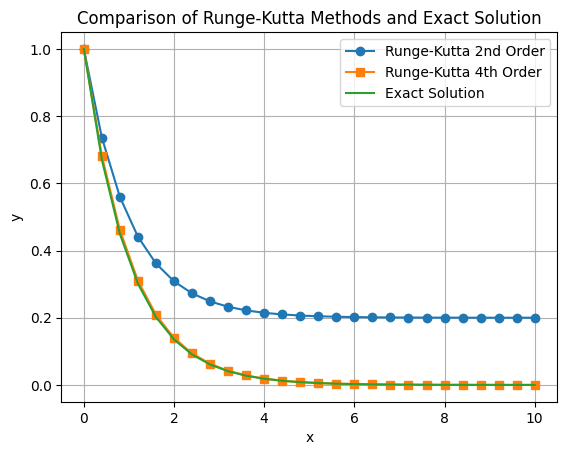

In [6]:
x0, x_end = 0, 10
y0 = 1
h = 0.4

x_rk2, y_rk2 = runge_kutta_2nd_order(differential_evolution, y0, x0, x_end, h)
x_rk4, y_rk4 = runge_kutta_4th_order(differential_evolution, y0, x0, x_end, h)

plt.plot(x_rk2, y_rk2, "o-", label="Runge-Kutta 2nd Order")
plt.plot(x_rk4, y_rk4, "s-", label="Runge-Kutta 4th Order")
plt.plot(x_exact, y_exact, "-", label="Exact Solution")

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.title("Comparison of Runge-Kutta Methods and Exact Solution")
plt.show()


### 5.2. Przybliżone rozwiązywanie równań różniczkowych drugiego rzędu

### 5.2.1. Metoda różnic skończonych

Rozważmy zagadnienie brzegowe dla równania różniczkowego drugiego rzędu

$$
\left\{\begin{array}{l}
-y^{\prime \prime}+q(x) y=g(x), \quad x \in(a, b) \\
y(a)=\alpha \\
y(b)=\beta
\end{array}\right.
$$

gdzie $q(x) \in C([a, b]), q(x) \geqslant 0$.
Przybliżone rozwiązanie można otrzymać z równania macierzowego

$$
\left[\begin{array}{cccccc}
2+q_{1} h^{2} & -1 & 0 & \ldots & 0 & 0 \\
-1 & 2+q_{2} h^{2} & -1 & \ldots & 0 & 0 \\
\vdots & \vdots & \ddots & \ddots & \ddots & \vdots \\
0 & 0 & 0 & \ldots & -1 & 2+q_{N-1} h^{2}
\end{array}\right]\left[\begin{array}{c}
y_{0} \\
y_{1} \\
\vdots \\
y_{N}
\end{array}\right]=\left[\begin{array}{c}
g_{1} h^{2} \\
g_{2} h^{2} \\
\vdots \\
g_{N} h^{2}
\end{array}\right] .
$$

Oszacowanie błędu przy założeniu $y \in C^{4}([a, b])$ to

$$
\left|y\left(x_{i}\right)-y_{i}\right| \leqslant \frac{M h^{2}}{24}\left(x_{i}-a\right)\left(x_{i}-b\right) .
$$

Do rozwiązywania równań różnicowych można wykrozystać metodę przeganiania. W ogólnym schemacie rozważa się układ równań

$$
\left\{\begin{array}{l}
a_{i} y_{i-1}+b_{i} y_{i}+c_{i} y_{i+1}=f_{i} \\
y_{0}=\alpha \\
y_{N}=\beta
\end{array}\right.
$$

Na początku konstruujemy ciągi

$$
\begin{aligned}
L_{1} & =\frac{-c_{1}}{b_{1}}, K_{1}=\frac{f_{1}-a_{1} \alpha}{b_{1}}, \\
L_{i+1} & =\frac{-c_{i+1}}{a_{i+1} L_{i}+b_{i+1}}, K_{i+1}=\frac{f_{i+1}-a_{i+1} K_{i}}{a_{i+1} L_{i}+b_{i+1}}, i=1,2, \ldots, N-2
\end{aligned}
$$

Dalej idziemy od końca

$$
\begin{aligned}
& y_{N}=\beta, \\
& y_{N-1}=L_{N-1} y_{N}+K_{N-1}, \\
& \vdots \\
& y_{i}=L_{i} y_{i+1}+K_{i}, \\
& \vdots \\
& y_{1}=L_{1} y_{2}+K_{1} .
\end{aligned}
$$


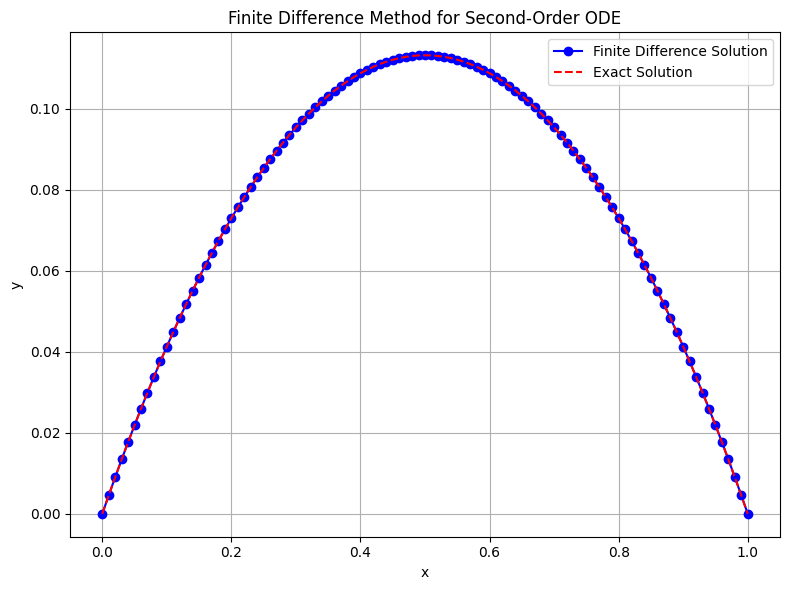

In [ ]:
a, b = 0, 1
N = 100
alpha, beta = 0, 0

def q(x):
    return 1

def g(x):
    return 1


def exact_solution(x):
    return -1 / (1 + np.e) * np.exp(x) - np.e / (1 + np.e) * np.exp(-x) + 1


x, y = finite_difference_method(a, b, N, q, g, alpha, beta)


plt.figure(figsize=(8, 6))
plt.plot(
    x, y, label="Finite Difference Solution", marker="o", linestyle="-", color="blue"
)
plt.plot(x, exact_solution(x), label="Exact Solution", linestyle="--", color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Finite Difference Method for Second-Order ODE")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### 5.2.2. Metoda elementów skończonych (Ritza-Galerkina)

Rozważamy zagadnienie brzegowe dla równania różniczkowego drugiego rzędu postaci

$$
\left\{\begin{array}{l}
-\left(p(x) y^{\prime}(x)\right)^{\prime}+q(x) y(x)=f(x), \quad x \in(a, b) \\
y(a)=y(b)=0
\end{array}\right.
$$

gdzie $p, q, f:[a, b] \rightarrow \mathbb{R}$ są danymi funkcjami.
Uwaga Ogólny warunek brzegowy $y(a)=\alpha, y(b)=\beta$ można łatwo zmienić na jednorodny, wprowadzając nową funkcję

$$
\bar{y}(x)=y(x)-\frac{\beta-\alpha}{b-a}(x-a)-\alpha,
$$

która spełnia zagadnienie brzegowe z nieco zmienioną prawą stroną równania.
Przybliżone rozwiązanie $y_{h}(x)$ zadane jest wzorem

$$
y_{h}(x)=\sum_{i=1}^{N-1} y_{i} \phi_{i}(x),
$$

gdzie funkcje $\phi_{i}(x)$ mają postać

$$
\phi_{i}(x)= \begin{cases}0 & \text { dla } x \notin\left(x_{i-1}, x_{i+1}\right), \\ 1-\frac{\left|x-x_{i}\right|}{h} & \text { dla } x \in\left(x_{i-1}, x_{i+1}\right),\end{cases}
$$

natomiast $y_{i}$ wyznacza się z równania macierzowego $A \vec{y}=\vec{f}$, gdzie

$$
\begin{aligned}
a_{i j} & =\int_{a}^{b} p(x) \phi_{i}^{\prime}(x) \phi_{j}^{\prime}(x) \mathrm{d} x+\int_{a}^{b} q(x) \phi_{i}(x) \phi_{j}(x) \mathrm{d} x, \\
f_{j} & =\int_{a}^{b} f(x) \phi_{j}(x) \mathrm{d} x .
\end{aligned}
$$

Dla stałych współczynników $p$ i $q$ :

$$
a_{i j}= \begin{cases}\frac{2 p}{h}+\frac{4 q h}{6} & \text { dla } j=i, \\ -\frac{p}{h}+\frac{q h}{6} & \text { dla } j \in i-1, i+1, \\ 0 & \text { dla } j \notin i-1, i, i+1 .\end{cases}
$$

Dla zmiennych współczynników $p$ i $q$ :

1. $j=i$

$$
\begin{aligned}
a_{i j} & =\frac{1}{h^{2}} \int_{x_{i-1}}^{x_{i+1}} p(x) \mathrm{d} x+\int_{x_{i-1}}^{x_{i}} q(x)\left(1+\frac{x-x_{i}}{h}\right)^{2} \mathrm{~d} x \\
& +\int_{x_{i}}^{x_{i+1}} q(x)\left(1-\frac{x-x_{i}}{h}\right)^{2} \mathrm{~d} x,
\end{aligned}
$$

2. $j=i+1$

$$
\begin{aligned}
a_{i j} & =-\frac{1}{h^{2}} \int_{x_{i}}^{x_{i+1}} p(x) \mathrm{d} x \\
& +\int_{x_{i}}^{x_{i+1}} q(x)\left(1-\frac{x-x_{i}}{h}\right)\left(1+\frac{x-x_{i+1}}{h}\right) \mathrm{d} x
\end{aligned}
$$

3. $j=i-1$

$$
\begin{aligned}
a_{i j} & =-\frac{1}{h^{2}} \int_{x_{i-1}}^{x_{i}} p(x) \mathrm{d} x \\
& +\int_{x_{i-1}}^{x_{i}} q(x)\left(1+\frac{x-x_{i}}{h}\right)\left(1-\frac{x-x_{i-1}}{h}\right) \mathrm{d} x
\end{aligned}
$$


### 5.3. Przybliżone rozwiązywanie równania ciepła

### 5.3.1. Metoda różnic skończonych

Rozważamy jedonwymiarowe równanie ciepła (dyfuzji)

$$
\frac{\partial u}{\partial t}(x, t)=c \frac{\partial^{2} u}{\partial x^{2}}(x, t)
$$

określone dla $0<x<L, 0<t<T$. Ponadto zakładamy, że spełnione są warunki brzegowe

$$
u(0, t)=\alpha, \quad u(L, t)=\beta
$$

dla $0<t<T$ oraz warunek początkowy

$$
u(x, 0)=f(x)
$$

dla $0<x<L$, gdzie $f$ jest daną funkcją rzeczywistą. Stała $c>0$ nazywa się współczynnikiem przewodzenia ciepła (dyfuzji).

W celu konstrukcji przybliżonego rozwiązania zagadnienia początkowobrzegowego, w pierwszym kroku dokonujemy równomiernego podziału przedziałów $[0, L]$ i $[0, T]$ :

$$
\begin{gathered}
0=x_{0}<x_{1}<\ldots<x_{n}=L, \quad h=x_{i+1}-x_{i} \\
0=t_{0}<t_{1}<\ldots<t_{m}=T, \quad \Delta t=t_{k+1}-t_{k}
\end{gathered}
$$

Wprowadźmy oznaczenie $u_{i}^{k} \approx u\left(x_{i}, t_{k}\right)$, gdzie $u$ jest rozwiązaniem zagadnienia początkowo-brzegowego dla równania ciepła. Dodatkowo definiujemy wektor $\vec{u}^{k}=\left(u_{1}^{k}, u_{2}^{k}, \ldots, u_{n-1}^{k}\right)^{T}$.

Schemat jawny zadany jest równaniem macierzowym

Uwaga Aby metoda jawna była stabilna, musi być spełniony warunek Couranta-Friedrichsa-Lewy'ego

$$
\lambda<\frac{1}{2}
$$

Schemat niejawny zadany jest równaniem macierzowym

$$
B \vec{u}^{k}=\vec{u}^{k-1}
$$

$$
B=\left[\begin{array}{cccccc}
1+2 \lambda & -\lambda & 0 & \ldots & 0 & 0 \\
-\lambda & 1+2 \lambda & 0-\lambda & \ldots & 0 & 0 \\
\vdots & \vdots & \ddots & \ddots & \ddots & \vdots \\
0 & 0 & 0 & \ldots & -\lambda & 1+2 \lambda
\end{array}\right], \quad \lambda=\frac{c \Delta t}{h^{2}} .
$$

Schemat Cranka-Nicolsona otrzymujemy w wyniku uśrednienia schematu jawnego i niejawnego. Zadany jest równaniem macierzowym

$$
A \vec{u}^{k}=B \vec{u}^{k-1}
$$

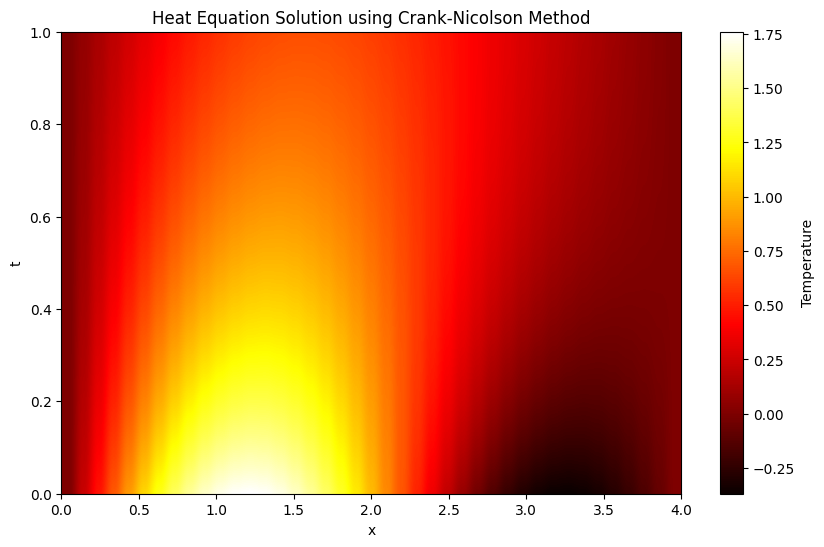

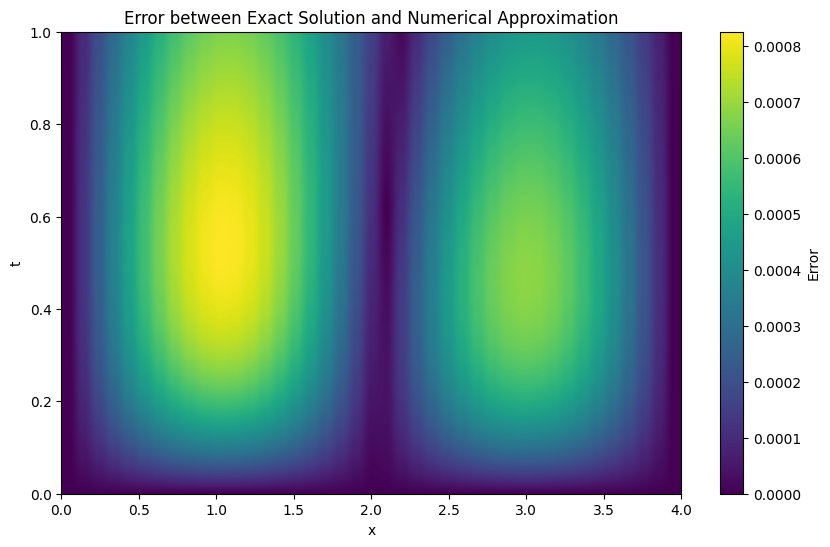

In [10]:
# Constants
c = 8 / np.pi**2  # Diffusion coefficient
L = 4  # Length of the rod
T = 1  # Total time
n = 40  # Number of spatial divisions
m = 200  # Number of time steps
alpha = 0  # Boundary condition at x=0
beta = 0  # Boundary condition at x=L


# Exact solution function
def exact_solution(x, t):
    return np.exp(-2 * t) * np.sin(np.pi * x / 2) + np.exp(-t / 2) * np.sin(
        np.pi * x / 4
    )


# Initial condition function
def initial_condition(x):
    return exact_solution(x, 0)


# Solve the heat equation using the Crank-Nicolson method
xn, tm, u_approx = solve_heat_equation(L, T, n, m, c, alpha, beta, initial_condition)

plt.figure(figsize=(10, 6))
plt.imshow(u_approx.T, extent=[0, L, 0, T], aspect="auto", origin="lower", cmap="hot")
plt.colorbar(label="Temperature")
plt.xlabel("x")
plt.ylabel("t")
plt.title("Heat Equation Solution using Crank-Nicolson Method")
plt.show()

u_exact = np.array([[exact_solution(x, t) for x in xn] for t in tm]).T
error = np.abs(u_exact - u_approx)

plt.figure(figsize=(10, 6))
plt.imshow(error.T, extent=[0, L, 0, T], aspect="auto", origin="lower", cmap="viridis")
plt.colorbar(label="Error")
plt.xlabel("x")
plt.ylabel("t")
plt.title("Error between Exact Solution and Numerical Approximation")
plt.show()

In [ ]:
from matplotlib.animation import FuncAnimation, PillowWriter

fig, ax = plt.subplots(figsize=(8, 6))
(line,) = ax.plot(xn, u_approx[:, 0], color="blue")
ax.set_xlim(0, L)
ax.set_ylim(np.min(u_approx), np.max(u_approx))
ax.set_xlabel("x")
ax.set_ylabel("u(x, t)")
ax.set_title("Heat Equation Solution Changing Over Time")


def update(frame):
    line.set_ydata(u_approx[:, frame])
    ax.set_title(f"Heat Equation Solution at t={tm[frame]:.3f}")
    return (line,)


ani = FuncAnimation(fig, update, frames=len(tm), interval=50, blit=True)
ani.save("../figures/heat_equation_solution.gif", writer=PillowWriter(fps=20))

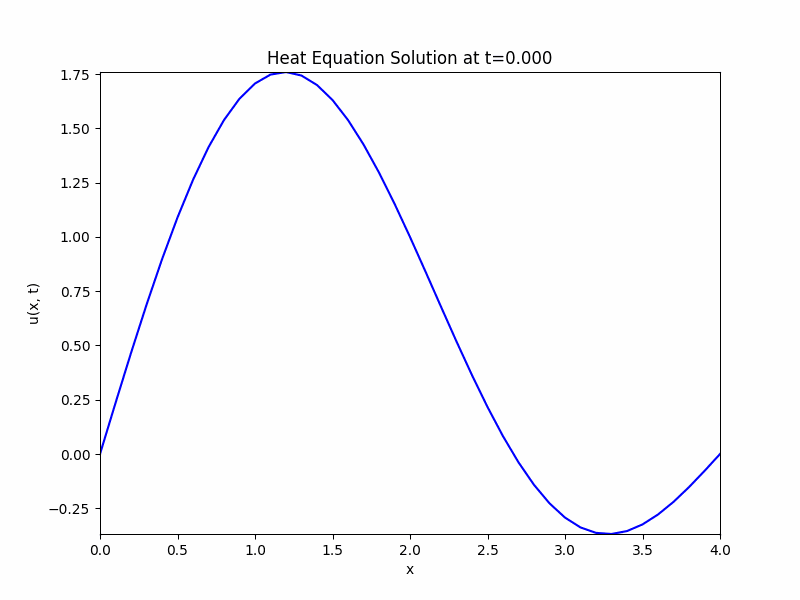

In [17]:
from IPython.display import Image

Image(filename="../figures/heat_equation_solution.gif")